**Seeding for reproducibility**

In [ ]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

**Data Curation**

In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentails = json.load(open("kaggle.json"))

In [ ]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0


**Mounting and Saving datasset to drive**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

!cp /content/plantvillage-dataset.zip /content/drive/My\ Drive/  # copying dataset to g_drive

**Loading dataset directly from Drive**

In [ ]:
!unzip /content/drive/My\ Drive/plantvillage-dataset.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e345153-aed9-4879-a2cc-24f9dc5100e7___UF.GRC_YLCV_Lab 01798_final_masked.jpg  
  inflating: /content/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e37e8ad-3944-4e11-bc10-dd82616274d7___YLCV_NREC 2915_final_masked.jpg  
  inflating: /content/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e382244-fb3a-4caa-af71-05fff25f1c27___UF.GRC_YLCV_Lab 03397_final_masked.jpg  
  inflating: /content/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e3b9886-ce13-49d5-8f80-ccf4e5ddbeac___YLCV_GCREC 5479_final_masked.jpg  
  inflating: /content/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e615038-7a87-446a-a2cd-f76c5c75b6dd___YLCV_GCREC 5144_final_masked.jpg  
  inflating: /content/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e6938d9-1ab0-47

In [ ]:
!ls

drive  kaggle.json  plantvillage-dataset.zip  sample_data


In [ ]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'grayscale', 'segmented']
38
['Grape___Esca_(Black_Measles)', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Grape___Black_rot', 'Tomato___Bacterial_spot', 'Corn_(maize)___healthy']
38
['Grape___Esca_(Black_Measles)', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Grape___Black_rot', 'Tomato___Bacterial_spot', 'Corn_(maize)___healthy']
38
['Grape___Esca_(Black_Measles)', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Grape___Black_rot', 'Tomato___Bacterial_spot', 'Corn_(maize)___healthy']


**Number of Classes = 38**

In [ ]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['c197dfe9-44d6-4a7e-bb5a-75e2bf05380b___Mt.N.V_HL 6100.JPG', '9ceba66a-d7b0-4ed4-98c3-37d361517a90___Mt.N.V_HL 6147.JPG', 'c05f4201-5ab9-4bbd-b19e-c36515b7b3a9___Mt.N.V_HL 6134.JPG', '41506a32-a472-4ca3-a8e0-4980c179096b___Mt.N.V_HL 6206.JPG', 'e4dc54f7-46a2-47d4-889c-477883df2767___Mt.N.V_HL 9079.JPG']


**Data Preprocessing**

In [ ]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


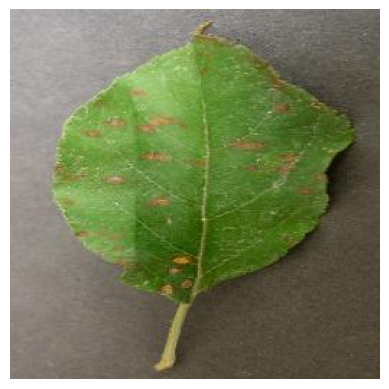

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]


In [ ]:
# Image Parameters
img_size = 224
batch_size = 32

**Train Test Split**

In [ ]:
# Image Data Generators
# data_gen = ImageDataGenerator(
#     rescale=1./255,
#     validation_split=0.2  # Use 20% of data for validation
# )

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training data augmentation
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

In [ ]:
# Train Generator
# train_generator = data_gen.flow_from_directory(
#     base_dir,
#     target_size=(img_size, img_size),
#     batch_size=batch_size,
#     subset='training',
#     class_mode='categorical'
# )

train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
# Validation Generator
# validation_generator = data_gen.flow_from_directory(
#     base_dir,
#     target_size=(img_size, img_size),
#     batch_size=batch_size,
#     subset='validation',
#     class_mode='categorical'
# )

# val_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


**Directly loading tranined model**

In [ ]:
 from tensorflow.keras.models import load_model
 model = load_model('/content/drive/MyDrive/plant_disease_model.h5')

**Convolutional Neural Network**

In [ ]:
# Model Definition
# model = models.Sequential()

# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
# model.add(layers.MaxPooling2D(2, 2))

# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D(2, 2))


# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

# New Model
model = models.Sequential()

# 1st Conv Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

# 2nd Conv Layer (Extra layer added)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

# 3rd Conv Layer (Newly added)
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

# 4th Conv Layer (Newly added)
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

# Flatten Layer
model.add(layers.Flatten())

# Fully Connected Layers (Dense Layers)
model.add(layers.Dense(512, activation='relu'))  # Previously 256
model.add(layers.Dropout(0.3))  # Dropout added to avoid overfitting
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,698,024 (37.00 MB)

 Trainable params: 9,698,022 (37.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Model Training**

In [ ]:
# Training the Model
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
#     epochs=5,  # Number of epochs
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples // batch_size  # Validation steps
# )


from tensorflow.keras.callbacks import EarlyStopping

# Early Stopping Callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Validation loss ko monitor karega
    patience=3,          # Agar 3 epochs tak improvement nahi hota, to stop kar dega
    restore_best_weights=True  # Best weights ko restore karega
)

# Train Model with Early Stopping
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=14,  # Pehle se thoda zyada epochs rakh lo, kyunki early stopping automatically rok dega
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping]  # Yeh callback add karna important hai
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/14
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 812s 591ms/step - accuracy: 0.3631 - loss: 2.3431 - val_accuracy: 0.6814 - val_loss: 1.0321
Epoch 2/14
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 790s 582ms/step - accuracy: 0.7239 - loss: 0.8919 - val_accuracy: 0.8214 - val_loss: 0.5485
Epoch 3/14
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 800s 581ms/step - accuracy: 0.8094 - loss: 0.5919 - val_accuracy: 0.8848 - val_loss: 0.3524
Epoch 4/14
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 798s 578ms/step - accuracy: 0.8521 - loss: 0.4567 - val_accuracy: 0.8620 - val_loss: 0.4075
Epoch 5/14
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 788s 580ms/step - accuracy: 0.8778 - loss: 0.3798 - val_accuracy: 0.9196 - val_loss: 0.2445
Epoch 6/14
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 861s 624ms/step - accuracy: 0.8915 - loss: 0.3323 - val_accuracy: 0.8912 - val_loss: 0.3312
Epoch 7/14
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 776s 572ms/step - accuracy: 0.9061 - loss: 0.2868 - val_accuracy: 0.9287 - val_loss: 0.2086
Epoch 8/14
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 776s 571ms/step - ac

**Model Evaluation**

In [ ]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


339/339 ━━━━━━━━━━━━━━━━━━━━ 131s 378ms/step - accuracy: 0.9523 - loss: 0.1497
Validation Accuracy: 95.23%


In [ ]:
# Option A: Keras HDF5 format
# model.save('/content/drive/MyDrive/plant_disease_model.h5')

# HDF5 se load
# from tensorflow.keras.models import load_model
# model = load_model('/content/drive/MyDrive/plant_disease_model.h5')


# **********************************************
# First save the trained model
# model.save('/content/plant_disease_model.h5')

# Now after saving download it in our system
#Downloading model in our system
# from google.colab import files
# files.download('/content/plant_disease_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

**Building a Predictive System**

In [ ]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
# Example Usage
image_path = '/content/plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class Name: Apple___Apple_scab


**Save the model to Google drive or local**

In [ ]:
model.save('drive/MyDrive/Youtube/trained_models/plant_disease_prediction_model_checkpoint.h5')


In [ ]:
model.save_weights('/content/drive/MyDrive/Youtube/trained_models/plant_disease_prediction_model_checkpoint.weights.h5')